# VIZ

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from nltk.sentiment.vader import SentimentIntensityAnalyzer

READ IN FULL CSV

In [2]:
df = pd.read_csv('./data/cleaned_engineered.csv')
df.drop(columns='Unnamed: 0', inplace=True)
df.describe()

,created_utc,topics,sentiment_compound,sentiment_neu,sentiment_neg,sentiment_pos,text_sentiment_compound,text_sentiment_neu,text_sentiment_neg,text_sentiment_pos,title_selftext_sentiment_compound,title_selftext_sentiment_neu,title_selftext_sentiment_neg,title_selftext_sentiment_pos,title_length,title_selftext_length,text_length,title_word_count,title_selftext_word_count,text_word_count
count,4.199000e+03,4199.000000,4199.000000,4199.000000,4199.000000,4199.000000,4199.000000,4199.000000,4199.000000,4199.000000,4199.000000,4199.000000,4199.000000,4199.000000,4199.000000,4199.000000,4199.000000,4199.000000,4199.000000,4199.000000
mean,1.643520e+09,0.499881,0.178600,0.817393,0.037107,0.145258,0.260289,0.839099,0.033027,0.127878,0.292624,0.810681,0.036910,0.152172,59.976661,208.238866,220.005716,10.574422,36.473922,36.473922
std,2.172749e+06,0.500060,0.340096,0.217263,0.104106,0.203343,0.427538,0.173396,0.078742,0.163493,0.433806,0.191996,0.086362,0.182635,48.561277,358.024452,357.996644,8.820270,62.438965,62.438965
min,1.638518e+09,0.000000,-0.850200,0.000000,0.000000,0.000000,-0.981400,0.172000,0.000000,0.000000,-0.981400,0.000000,0.000000,0.000000,1.000000,1.000000,12.000000,1.000000,1.000000,1.000000
25%,1.641899e+09,0.000000,0.000000,0.674000,0.000000,0.000000,0.000000,0.746000,0.000000,0.000000,0.000000,0.711000,0.000000,0.000000,28.000000,38.000000,49.500000,5.000000,7.000000,7.000000
50%,1.644259e+09,0.000000,0.000000,0.892000,0.000000,0.000000,0.115900,0.868000,0.000000,0.072000,0.286900,0.839000,0.000000,0.102000,45.000000,74.000000,86.000000,8.000000,13.000000,13.000000
75%,1.645256e+09,1.000000,0.458800,1.000000,0.000000,0.268000,0.626100,1.000000,0.029000,0.204000,0.658700,1.000000,0.034000,0.238000,75.000000,212.500000,224.000000,13.000000,37.000000,37.000000
max,1.646156e+09,1.000000,0.975300,1.000000,0.811000,1.000000,0.999400,1.000000,0.811000,0.828000,0.999400,1.000000,0.811000,1.000000,299.000000,8547.000000,8555.000000,61.000000,1519.000000,1519.000000


READ IN CVEC CSV

In [13]:
cvec = pd.read_csv('./data/cvec.csv')
cvec.drop(columns='Unnamed: 0', inplace=True)
cvec.describe()

,00,000,00chill00chill00,01,02,08,10,100,1000,100ml,...,zero,zeros,zone,zookeepergame109,øl,بالمزاحميةamaan,تنظيف,شركة,مكيفات,topics
count,4199.000000,4199.000000,4199.000000,4199.000000,4199.000000,4199.000000,4199.000000,4199.000000,4199.000000,4199.000000,...,4199.000000,4199.000000,4199.000000,4199.000000,4199.000000,4199.000000,4199.000000,4199.000000,4199.000000,4199.000000
mean,0.000953,0.002858,0.000476,0.002382,0.000953,0.000714,0.026673,0.006906,0.004287,0.000476,...,0.014527,0.000476,0.001191,0.000476,0.000476,0.000476,0.000476,0.000476,0.000476,0.499881
std,0.030853,0.057678,0.021822,0.099995,0.048797,0.026723,0.190916,0.091047,0.087203,0.021822,...,0.132870,0.021822,0.034491,0.021822,0.021822,0.021822,0.021822,0.021822,0.021822,0.500060
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,2.000000,1.000000,6.000000,3.000000,1.000000,6.000000,2.000000,4.000000,1.000000,...,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


most common words in whole df with key words like epsresso and beer removed

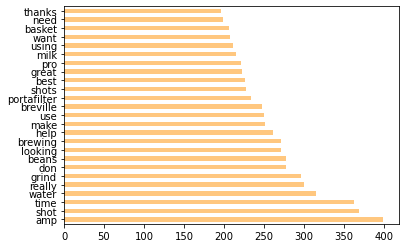

In [15]:
(cvec.drop(columns=['topics', 'machine', 'grinder', 'coffee', 'espresso', 'beer'])).sum(axis=0).sort_values(ascending=False).head(25).plot(kind='barh', cmap='copper_r');

In [16]:
#create beer df 
beer_df = df[df['topics']==1]
#beer_df.head(30)

code in this section was supported by Katie Sylvia

In [17]:
#get beer sentiment score
beer_score = beer_df["title_selftext_sentiment_pos"].mean(), beer_df["title_selftext_sentiment_neg"].mean()
beer_score

(0.18548022868032416, 0.034656503096712726)

In [18]:
#create espresso df
espresso_df = df[df['topics']==0]
espresso_df.head()

,id,author,title,selftext,subreddit,created_utc,topics,title_selftext,all_text,sentiment,...,title_selftext_sentiment_compound,title_selftext_sentiment_neu,title_selftext_sentiment_neg,title_selftext_sentiment_pos,title_length,title_selftext_length,text_length,title_word_count,title_selftext_word_count,text_word_count
0,t4d8wr,aman1791,First setup! I got reallyyy lucky with marketp...,NaN,espresso,1646155687,0,First setup! I got reallyyy lucky with marketp...,First setup! I got reallyyy lucky with marketp...,"{'neg': 0.0, 'neu': 0.721, 'pos': 0.279, 'comp...",...,0.4753,0.721,0.000,0.279,67,67,75,10,10,10
1,t4cy77,rc1024,Made myself a wdt tool with stand.,NaN,espresso,1646154916,0,Made myself a wdt tool with stand.,Made myself a wdt tool with stand.rc1024,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",...,0.0000,1.000,0.000,0.000,34,34,40,7,7,7
2,t4cx8p,carsononline,Help with Lelit Bianca Paddle Resolution,"So, I have a lelit bianca, and it seems as tho...",espresso,1646154847,0,"Help with Lelit Bianca Paddle ResolutionSo, I ...","Help with Lelit Bianca Paddle ResolutionSo, I ...","{'neg': 0.0, 'neu': 0.649, 'pos': 0.351, 'comp...",...,0.8410,0.773,0.088,0.139,40,861,873,6,154,154
3,t4cvtk,carsononline,Lelit Bianca Resolution on Paddle Question,NaN,espresso,1646154740,0,Lelit Bianca Resolution on Paddle Question,Lelit Bianca Resolution on Paddle Questioncars...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",...,0.0000,1.000,0.000,0.000,42,42,54,6,6,6
4,t4cuu0,no_lemming,tired of trial and error on espresso bean purc...,Anyone have a suggestion for a bean that can b...,espresso,1646154671,0,tired of trial and error on espresso bean purc...,tired of trial and error on espresso bean purc...,"{'neg': 0.444, 'neu': 0.556, 'pos': 0.0, 'comp...",...,0.9325,0.780,0.037,0.183,52,488,498,9,97,97


In [19]:
#get espresso sentiment score
espresso_score = espresso_df["title_selftext_sentiment_pos"].mean(), espresso_df["title_selftext_sentiment_neg"].mean()
espresso_score

(0.11887904761904759, 0.039162380952381004)

### bar plot of sentiment in subreddits

Thank you, Katie Sylvia for supplying the code for this barplot:

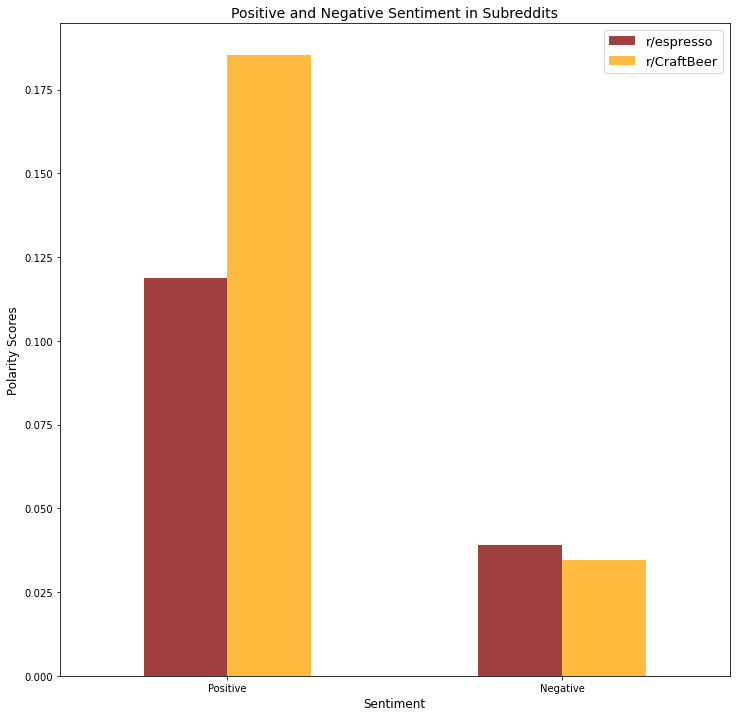

In [20]:
frame = {'r/espresso': espresso_score, 'r/CraftBeer': beer_score}

result = pd.DataFrame(frame)

bar_width = 0.35
opacity = 0.8  
result.plot.bar(color= ['maroon', 'orange'], figsize=(12,12), alpha=.75)

plt.xticks([0, 1], ["Positive", "Negative"],  rotation = 0)
plt.xlabel('Sentiment', fontsize = 12)
plt.ylabel('Polarity Scores', fontsize = 12)
plt.legend(loc = 'best', fontsize=13)
plt.title('Positive and Negative Sentiment in Subreddits', fontsize=14)

plt.show()

### histplot of distribution of wordcount in subreddits

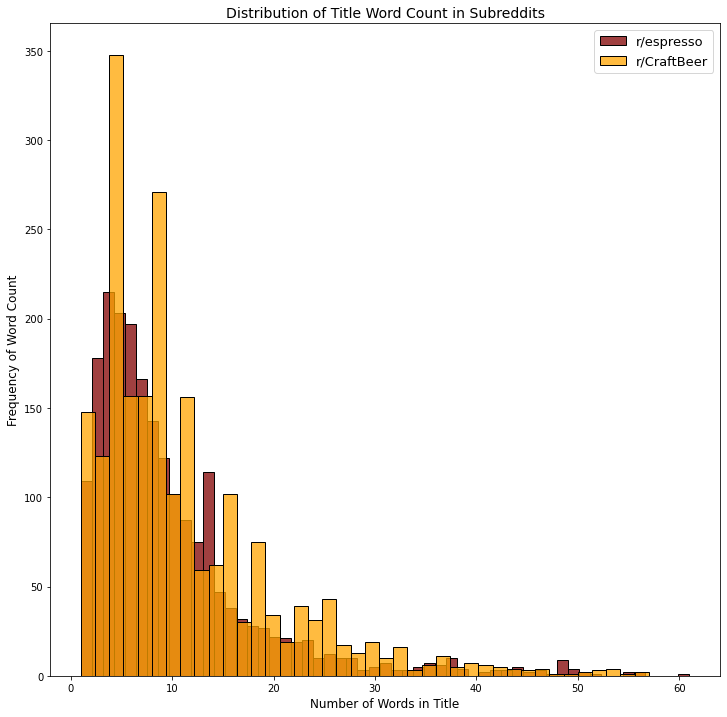

In [21]:
plt.figure(figsize=(12,12))
sns.histplot(df[df['topics']==0]['title_word_count'], color='maroon', label='r/espresso')
sns.histplot(df[df['topics']==1]['title_word_count'], color='orange', alpha=0.75, label='r/CraftBeer')
plt.xlabel('Number of Words in Title', fontsize=12)
plt.ylabel('Frequency of Word Count', fontsize=12)
plt.title('Distribution of Title Word Count in Subreddits', fontsize=14)
plt.legend(fontsize=13);

In [22]:
#dropped_word cvec for plotting
drop_cvec = cvec.drop(columns=['topics', 'machine', 'grinder', 'coffee', 'espresso', 'beer', 'brewery', 'brewing', 'don', 'amp', 'shots']).groupby(df['topics']).sum().T.sort_values(0, ascending=False)

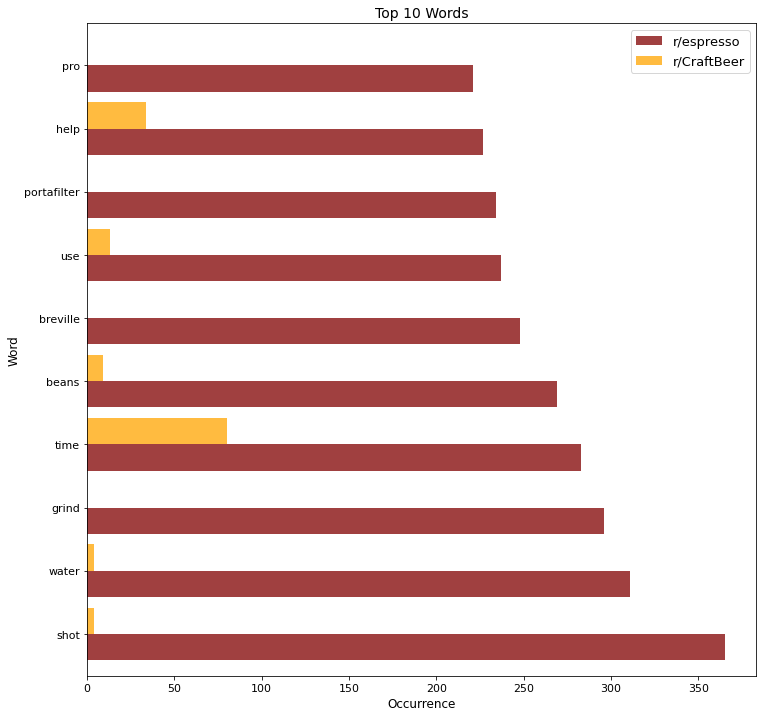

In [23]:
drop_cvec.head(10).plot(kind='barh', figsize=(12,12), color= ['maroon', 'orange'], alpha=.75, fontsize=11, width=.83)
plt.xlabel('Occurrence', fontsize=12)
plt.ylabel('Word', fontsize=12)
plt.title('Top 10 Words', fontsize=14)

plt.legend(labels=('r/espresso', 'r/CraftBeer'),loc='best', fontsize=13);

### top 10 espresso words

In [25]:
#espresso-specific cvec for plotting
espresso_cvec = cvec.drop(columns=['topics', 'machine', 'grinder', 'coffee', 'espresso', 'beer', 'beers', 'brewery', 'brewing', 'amp', 'don', 'shots']).groupby(df['topics']).sum().T.sort_values(0, ascending=False)[0]

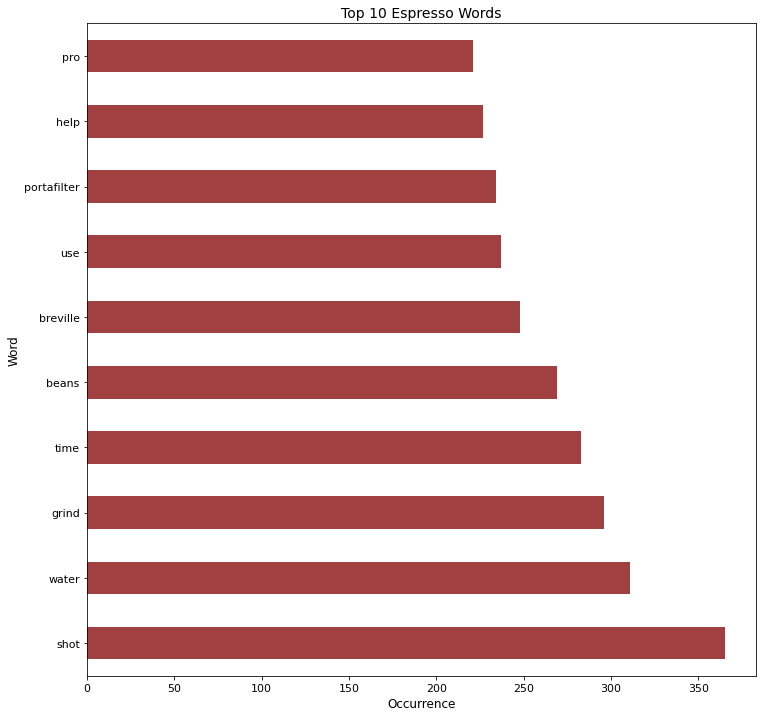

In [26]:
plt.figure(figsize=(12,12))
espresso_cvec.head(10).plot(kind='barh', color='maroon', fontsize=11, alpha=.75)
plt.xlabel('Occurrence', fontsize=12)
plt.ylabel('Word', fontsize=12)
plt.title('Top 10 Espresso Words', fontsize=14);

### top 10 beer words

In [29]:
#beer-specifc cvec for plotting
beer_cvec = cvec.drop(columns=['topics', 'machine', 'grinder', 'coffee', 'espresso', 'beer', 'beers', 'brewery', 'brewing', 'amp', 'breweries']).groupby(df['topics']).sum().T.sort_values(1, ascending=False)[1]

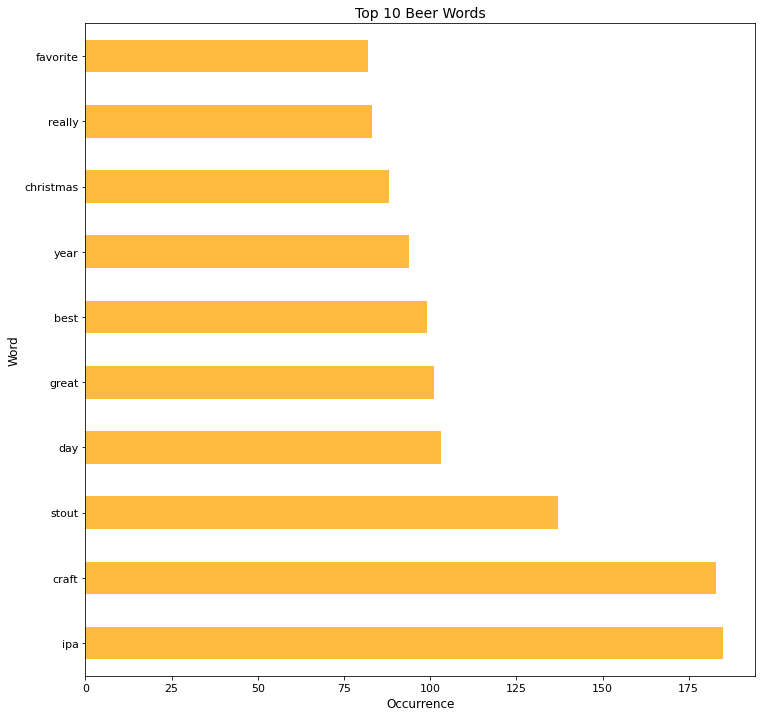

In [30]:
plt.figure(figsize=(12,12))
beer_cvec.head(10).plot(kind='barh', color='orange', alpha=.75, fontsize=11)
plt.xlabel('Occurrence', fontsize=12)
plt.ylabel('Word', fontsize=12)
plt.title('Top 10 Beer Words', fontsize=14);

READ IN BEST_PREDS_DF

In [31]:
preds_df = pd.read_csv('./data/best_preds.csv')
preds_df.drop(columns='Unnamed: 0', inplace=True)
preds_df.describe()

,actual,predicted,P(r/espresso),P(r/CraftBeer),Prob Diff
count,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000
mean,0.480000,0.504762,0.507297,0.492703,0.565673
std,0.499838,0.500216,0.315409,0.315409,0.279024
min,0.000000,0.000000,0.002441,0.004163,0.000091
25%,0.000000,0.000000,0.200468,0.186400,0.336225
50%,0.000000,1.000000,0.496218,0.503782,0.616251
75%,1.000000,1.000000,0.813600,0.799532,0.799586
max,1.000000,1.000000,0.995837,0.997559,0.995118


Curious about: problem words between sets. In next steps, would identify most common words among mis-categorized using wrong_preds_df

Wrong_preds code supplied by Katie Sylvia

In [32]:
pd.set_option('display.max_colwidth', None)
wrong_preds_df = preds_df[preds_df['actual']!=preds_df['predicted']]
very_wrong_preds_df = wrong_preds_df[wrong_preds_df['Prob Diff']>0.3]
very_wrong_preds_df.head()

,title_text,actual,predicted,P(r/espresso),P(r/CraftBeer),Prob Diff
335,"Mocha Made From A Strawberry Chocolate Bar From Valentine’s Day - Experiment Went Well, Tastes Great!",0,1,0.219390,0.780610,0.561220
352,"Colombian bean, (American) light roast (so probably not as light as some of the Nordic stuff but sold for pourover mostly). Delicious and bright, would be lovely with a tiny bit of sugar but was great straight too.",0,1,0.292331,0.707669,0.415339
425,Ready for lift off,0,1,0.335579,0.664421,0.328842
441,New Trail Gear Head,1,0,0.709547,0.290453,0.419095
509,Wolf’s Ridge - DW Coffee Joy.,1,0,0.971867,0.028133,0.943734


In [33]:
wrong_preds_df.sort_values(by='P(r/CraftBeer)', ascending=False).head()

,title_text,actual,predicted,P(r/espresso),P(r/CraftBeer),Prob Diff
335,"Mocha Made From A Strawberry Chocolate Bar From Valentine’s Day - Experiment Went Well, Tastes Great!",0,1,0.219390,0.780610,0.561220
902,Love these prints and the creator is super awesome.,0,1,0.261238,0.738762,0.477524
828,"yeah, cool. very nice.",0,1,0.283247,0.716753,0.433506
352,"Colombian bean, (American) light roast (so probably not as light as some of the Nordic stuff but sold for pourover mostly). Delicious and bright, would be lovely with a tiny bit of sugar but was great straight too.",0,1,0.292331,0.707669,0.415339
748,A Leather sleeve for Picopresson fan,0,1,0.330147,0.669853,0.339706


In [34]:
wrong_preds_df.sort_values(by='P(r/espresso)', ascending=False).head(10)

,title_text,actual,predicted,P(r/espresso),P(r/CraftBeer),Prob Diff
509,Wolf’s Ridge - DW Coffee Joy.,1,0,0.971867,0.028133,0.943734
895,can anyone please help me?[removed],1,0,0.868052,0.131948,0.736104
616,Pattern artist here! I can design and customize inspiration generated ART with full metadata and Complete Originality Licensed for your Use. 24 hour's turnaround! Competitive Price! Inbox Me,1,0,0.713351,0.286649,0.426702
441,New Trail Gear Head,1,0,0.709547,0.290453,0.419095
12,One of the more interesting picks I’ve tried recently.,1,0,0.594281,0.405719,0.188563
614,Start of a long weekend… also why do i have to add flair. (Dumb),1,0,0.579067,0.420933,0.158133
507,Finally got to make it to my Mecca last week,1,0,0.558986,0.441014,0.117973
1033,Heading to New England this spring looking for recommendationsI'll be driving from Asheville to Portland Maine and then east to Buffalo late June. I know some of the popular spots but am curious what the crowd suggests I should make sure to hit along the way. Many thanks in advance,1,0,0.553257,0.446743,0.106513
844,The month wait was so worth!,1,0,0.549392,0.450608,0.098785
470,"[Giveaway, US] Have 4 new brew bags to give away (22""x26""). Does anybody wanna take them off? PM me.",1,0,0.542959,0.457041,0.085918


In [35]:
#group by
median = df.groupby('topics')['title_length', 'text_sentiment_compound'].median()
mean = df.groupby('topics')['title_length', 'text_sentiment_compound'].mean()
print(median)
print(mean)

        title_length  text_sentiment_compound
topics                                       
0               43.0                   0.2023
1               47.0                   0.0000
        title_length  text_sentiment_compound
topics                                       
0          56.764762                 0.273010
1          63.190091                 0.247563


/var/folders/nf/hqtqkkg54s75vy60jfg0jcp00000gn/T/ipykernel_1227/2978173998.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  median = df.groupby('topics')['title_length', 'text_sentiment_compound'].median()
/var/folders/nf/hqtqkkg54s75vy60jfg0jcp00000gn/T/ipykernel_1227/2978173998.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean = df.groupby('topics')['title_length', 'text_sentiment_compound'].mean()
